In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as image

# Convolution algorithm

This algorithm must be improved in order to reduce the execution time (already done, but, could it be improved a little more?).

In [2]:
def convolution(img, kernel, edges="zeros"):
    """
    The convolution given by the kernel to the image img.
    
    img: array-like
        The image of shape (rows, cols, RGB(A)) to perform
        the convolution.
        
    kernel: array-like
        The kernel to use for the convolution. It must be a 
        square matrix with odd number of rows. 
        
    edges:
        How to deal with the edges of the image to use the
        kernel. By default the needed pixels are fill with
        zeros. 
    """
    
    #Convoluted image
    conv_img = np.zeros(img.shape, dtype=img.dtype)
    
    #Columns and rows to add
    dim_k  = kernel.shape[0]
    cr_add = int(0.5*(dim_k - 1))
    
    img_amp  = np.zeros((img.shape[0] + 2*cr_add,
                         img.shape[1] + 2*cr_add,
                         img.shape[2]),
                         dtype=img.dtype) 
    
    img_amp[cr_add:-cr_add, cr_add:-cr_add] = img
    
    #The algorithm starts creating dim_kxdim_k matrices with img_amp
    #along each column, but due to the way slices work it is neccessary 
    #to move down from the first row to create the matriz center at the
    #second, third and so on rows. To do so we just take a look (rs) at
    #the amount of rows that are leftover (or missing) from the last row.
    r  = img_amp.shape[0]%dim_k
    rs = [i if i<=r else (i-dim_k) for i in range(dim_k)]
    
    for layer in range(conv_img.shape[-1]):
        for col in range(conv_img.shape[1]):
            for j in range(dim_k):
                conv_img[j::dim_k, col, layer] = np.sum(
                                                    np.sum(img_amp[j:img_amp.shape[0] - r + rs[j],
                                                                   col:col+dim_k,
                                                                   layer].reshape(-1, dim_k, dim_k)\
                                                           *kernel,
                                                    axis=2),
                                                 axis=1)
                
    return conv_img

# Proof

Testing with different kernels

In [3]:
#Load the image
#img = image.imread("./free-photo-of-saint-anne-parish-in-antioquia.jpeg")
img = image.imread("./car.png", )[:,:,0:3]
img.shape

(147, 218, 3)

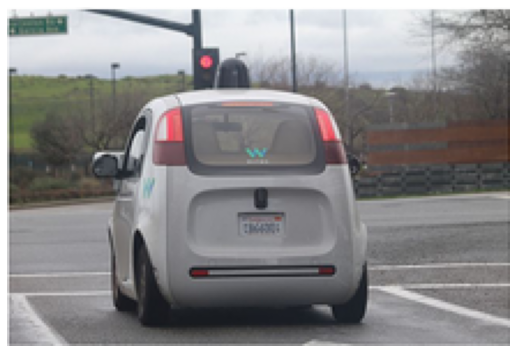

In [4]:
#plot
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(img)
ax.axis(False)
plt.show()

Some useful kernels

In [5]:
k_identity = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])


k_edge1 = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])


k_edge2 = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])

k_blur = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])/9

k_sobelh = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

k_sobelv = k_sobelh.T

k_canny = np.array([
    [2, 4, 5, 4, 2],
    [4, 9,12, 9, 4],
    [5,12,15,12, 5],
    [4, 9,12, 9, 4],
    [2, 4, 5, 4, 2]
])/159

In [6]:
img_identity = convolution(img, k_identity)
img_edge1    = convolution(img, k_edge1)
img_edge2    = convolution(img, k_edge2)
img_blur     = convolution(img, k_blur)
img_sobelh   = convolution(img, k_sobelh)
img_sobelv   = convolution(img, k_sobelv)
img_canny    = convolution(img, k_canny)

Plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


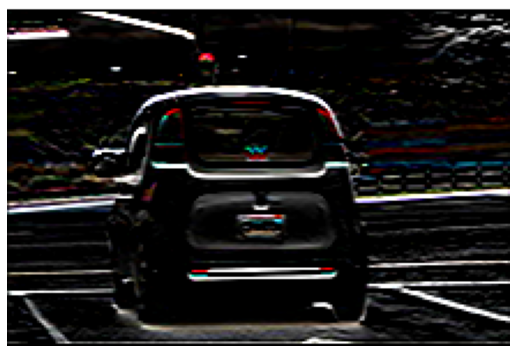

In [7]:
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(img_sobelh)
ax.axis(False)
plt.show()